In [2]:
# Import các thư viện cần thiết
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

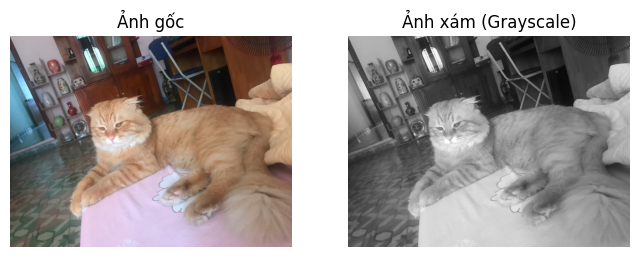

In [3]:
# Đường dẫn đến ảnh
image_path = '/home/ubuntu_qa/codevs/Computer vision/Kien～先生/Cloud/Image02.jpg'

# Kiểm tra xem ảnh có tồn tại không
if not os.path.exists(image_path):
    print(f"Ảnh không tồn tại: {image_path}")
else:
    # Đọc ảnh
    image = cv2.imread(image_path)
    
    # Kiểm tra xem ảnh có đọc được không
    if image is None:
        print("Lỗi!!!!!!!!!!! Kiểm tra lại đường dẫn ảnh")
    else:
        # Chuyển đổi sang ảnh xám
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Hiển thị ảnh gốc và ảnh xám
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.title("Ảnh gốc")
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title("Ảnh xám (Grayscale)")
        plt.imshow(gray_image, cmap='gray')
        plt.axis('off')

        plt.show()

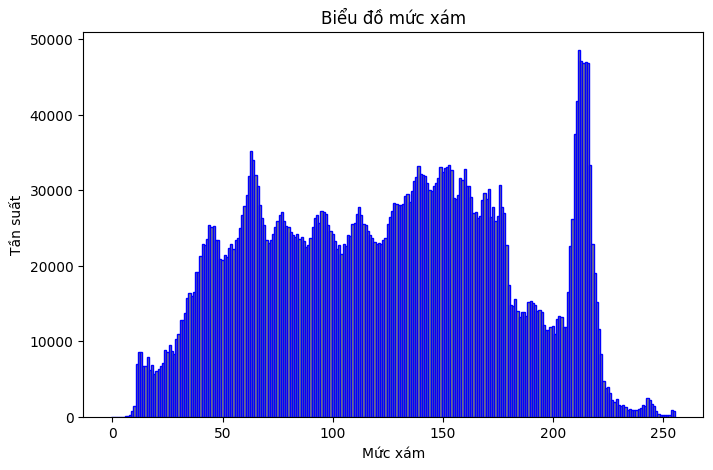

In [4]:
# Tính histogram của ảnh xám
histogram, bins = np.histogram(gray_image.flatten(), bins=256, range=[0, 256])

# Hiển thị histogram
plt.figure(figsize=(8, 5))
plt.title("Biểu đồ mức xám")
plt.xlabel("Mức xám")
plt.ylabel("Tần suất")
plt.bar(bins[:-1], histogram, width=1, color='gray', edgecolor='blue')
plt.show()


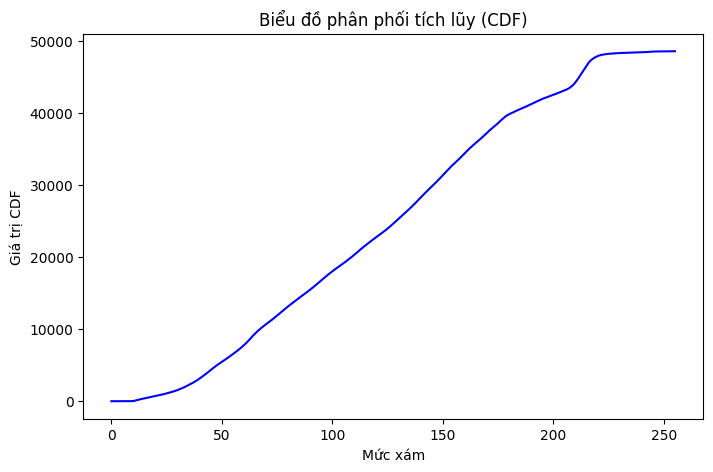

In [5]:
# Tính phân phối tích lũy (CDF)
cdf = histogram.cumsum()  # Tích lũy các giá trị
cdf_normalized = cdf * histogram.max() / cdf.max()  # Chuẩn hóa để dễ hiển thị

# Hiển thị CDF
plt.figure(figsize=(8, 5))
plt.title("Biểu đồ phân phối tích lũy (CDF)")
plt.xlabel("Mức xám")
plt.ylabel("Giá trị CDF")
plt.plot(cdf_normalized, color='blue')
plt.show()


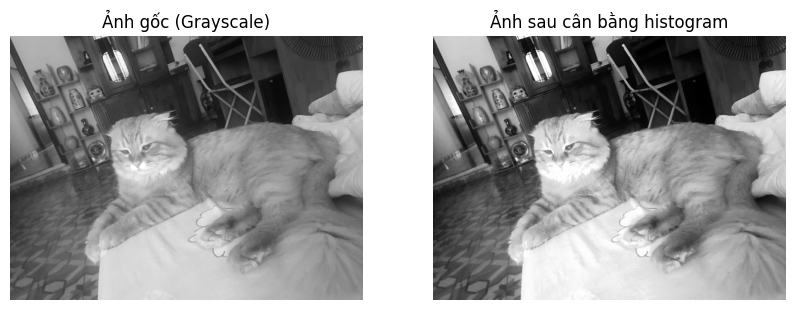

In [6]:
# Loại bỏ các giá trị bằng 0 trong CDF để tránh lỗi
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Chuẩn hóa giá trị
cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Thay giá trị 0 đã loại bỏ

# Ánh xạ lại ảnh theo giá trị CDF
equalized_image = cdf[gray_image]

# Hiển thị ảnh sau khi cân bằng histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Ảnh gốc (Grayscale)")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Ảnh sau cân bằng histogram")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()

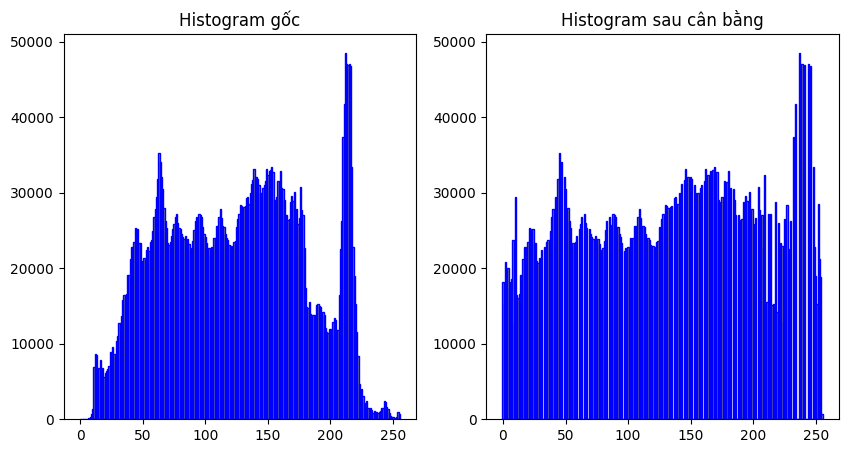

In [7]:
# Tính histogram sau cân bằng
histogram_eq, bins_eq = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])

# Hiển thị histogram trước và sau cân bằng
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Histogram gốc")
plt.bar(bins[:-1], histogram, width=1, color='gray', edgecolor='blue')

plt.subplot(1, 2, 2)
plt.title("Histogram sau cân bằng")
plt.bar(bins_eq[:-1], histogram_eq, width=1, color='gray', edgecolor='blue')

plt.show()


In [8]:
# Tính độ sáng trung bình trước và sau cân bằng
mean_brightness_before = gray_image.mean()
mean_brightness_after = equalized_image.mean()

print(f"Độ sáng trung bình trước cân bằng: {mean_brightness_before}")
print(f"Độ sáng trung bình sau cân bằng: {mean_brightness_after}")


Độ sáng trung bình trước cân bằng: 124.32526554963559
Độ sáng trung bình sau cân bằng: 127.66647216480172
